<a href="https://colab.research.google.com/github/RewinaB/peopleanalytics-regression-book/blob/master/logistic_regression_Performance_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Conduct an analysis to determine how the factors of financial performance, customer ratings and performance ratings influence the likelihood of a given salesperson being promoted.
---

# Logistic Regression

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [31]:
rand_state= 1000

In [32]:
df = pd.read_csv('http://peopleanalytics-regression-book.org/data/salespeople.csv')

In [33]:
df.head()

,promoted,sales,customer_rate,performance
0,0,594.0,3.94,2.0
1,0,446.0,4.06,3.0
2,1,674.0,3.83,4.0
3,0,525.0,3.62,2.0
4,1,657.0,4.40,3.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   promoted       351 non-null    int64  
 1   sales          350 non-null    float64
 2   customer_rate  350 non-null    float64
 3   performance    350 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 11.1 KB


In [35]:
import pandas as pd

# df['performance'] is a column representing performance
# df['promoted'] is a column representing promotion status

# Convert 'performance' column to ordered categorical with levels 1 to 4
df['performance'] = pd.Categorical(df['performance'], ordered=True, categories=[1, 2, 3, 4])

# Convert 'promoted' column to a factor (categorical)
df['promoted'] = df['promoted'].astype('category')


In [36]:
# first we look at target variable proportions:
pd.crosstab(df['promoted'],df['promoted'], normalize='all')*100

promoted,0,1
promoted,,
0,67.806268,0.000000
1,0.000000,32.193732


If the target variable is highly imbalanced, there areimplication for performance metrics like accuracy. F1 score, percison and recall are better metrics.

What is the benchmark accuracy? (common-sense accuracy)=67.8%

## Data preprocessing

In [37]:
df.isna().sum()

promoted         0
sales            1
customer_rate    1
performance      1
dtype: int64

In [38]:
# Filter out rows with missing values
df = df.dropna()

In [39]:
df.head()

,promoted,sales,customer_rate,performance
0,0,594.0,3.94,2
1,0,446.0,4.06,3
2,1,674.0,3.83,4
3,0,525.0,3.62,2
4,1,657.0,4.40,3


In [40]:
df.describe()

,sales,customer_rate
count,350.000000,350.000000
mean,527.005714,3.607886
std,185.224498,0.892087
min,151.000000,1.000000
25%,389.250000,3.000000
50%,475.000000,3.620000
75%,667.250000,4.290000
max,945.000000,5.000000


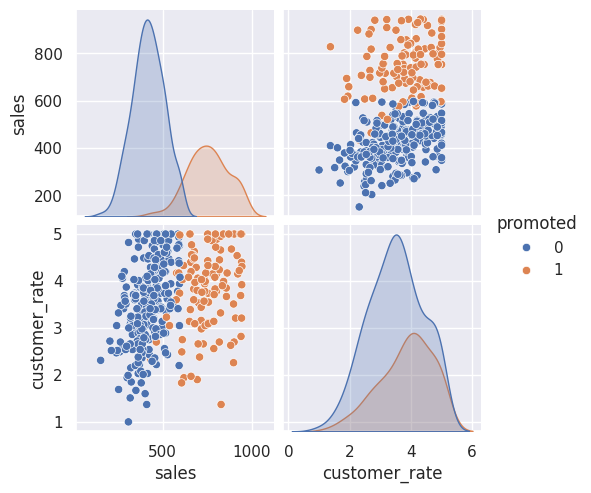

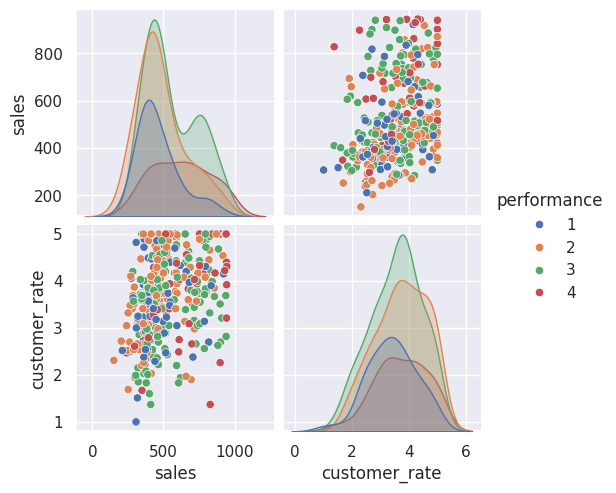

In [41]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your pandas DataFrame with two categorical variables

# Use Seaborn's pairplot function and specify the 'hue' parameter for each categorical variable
sns.pairplot(df, hue='promoted')# hue_order= ['category1', 'category2', 'category3']) # For the first categorical variable
sns.pairplot(df, hue='performance') # For the second categorical variable
plt.show()



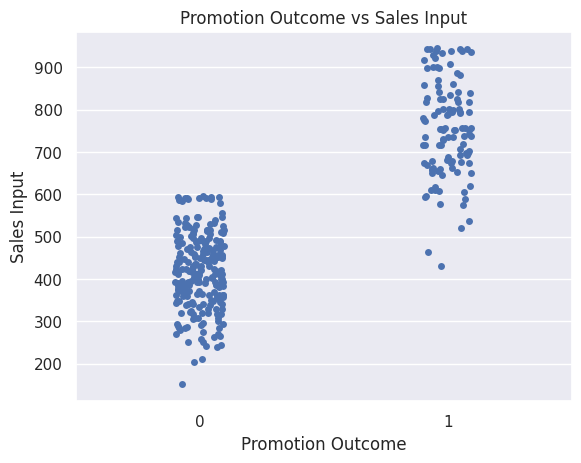

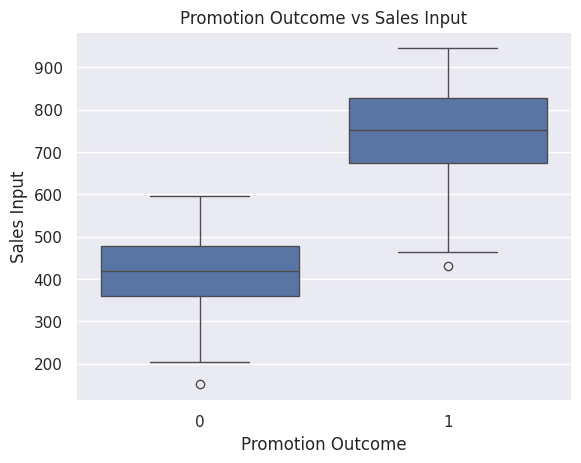

In [42]:


# df is your pandas DataFrame with 'promotion' and 'sales' columns

# Stripplot (for individual data points)
sns.stripplot(x='promoted', y='sales', data=df, jitter=True)
plt.xlabel('Promotion Outcome')
plt.ylabel('Sales Input')
plt.title('Promotion Outcome vs Sales Input')
plt.show()

# Boxplot (for summary statistics)
sns.boxplot(x='promoted', y='sales', data=df)
plt.xlabel('Promotion Outcome')
plt.ylabel('Sales Input')
plt.title('Promotion Outcome vs Sales Input')
plt.show()


It’s clear that promotion is more likely with higher sales levels. As we move along the
x
 axis from left to right and gradually include more and more individuals with higher sales, we know that the probability of promotion is gradually increasing overall.

Using the statsmodel.api, let’s take our simple case of regressing the promoted outcome against sales. We use a standard binomial GLM function and our standard formula notation




In [43]:
import pandas as pd
import statsmodels.api as sm

# df is your pandas DataFrame with 'promoted' and 'sales' columns

# Convert 'promoted' variable to numeric format (0 for not promoted, 1 for promoted)
df['promoted'] = pd.to_numeric(df['promoted'])

# Define the formula for the logistic regression model
formula = 'promoted ~ sales'

# Fit the logistic regression model
sales_model = sm.Logit.from_formula(formula, data=df).fit()

# View the coefficients
coefficients = sales_model.params
print(coefficients)



Optimization terminated successfully.
         Current function value: 0.103564
         Iterations 10
Intercept   -21.776420
sales         0.036758
dtype: float64


We can interpret the coefficients as follows:

The (Intercept) coefficient is the value of the log odds with zero input value of x —it is the log odds of promotion if you made no sales.

The sales coefficient represents the increase in the log odds of promotion associated with each unit increase in sales.

In [44]:
import numpy as np

# Assuming sales_model.coefficients contains the coefficients of the logistic regression model

# Extract coefficients from the fitted model
coefficients = sales_model.params

# Convert log odds to base odds
base_odds = np.exp(coefficients)

# Calculate odds ratio
odds_ratio = np.exp(coefficients)

# Print the results
print("Base odds:", base_odds)
print("Odds ratio:", odds_ratio)


Base odds: Intercept    3.488357e-10
sales        1.037442e+00
dtype: float64
Odds ratio: Intercept    3.488357e-10
sales        1.037442e+00
dtype: float64


 each unit (that is, every $1000) of sales multiplies the base odds by approximately 1.04—in other words, it increases the odds of promotion by 4%.

If a certain event has a probability of 0.1, then this means that its odds are 1:9, or 0.111. If the probability is 0.5, then the odds are 1, if the probability is 0.9, then the odds are 9, and if the probability is 0.99, the odds are 99. As we approach a probability of 1, the odds become exponentially large

### Defining variables and splitting the data

# This is multivariate binomial logistic regression

Let’s use a binomial logistic regression model to understand how each of the three inputs in our salespeople data set influence the likelihood of promotion.
It is good practice to convert the categorical performance variable to a dummy variable

In [45]:
import pandas as pd

# df is your pandas DataFrame with the 'performance' column

# Use pandas' get_dummies() function to convert 'performance' to dummy variables
df_dummies = pd.get_dummies(df, columns=['performance'])

# Check the first few rows to see if it worked
print(df_dummies.head())


   promoted  sales  customer_rate  performance_1  performance_2  \
0         0  594.0           3.94              0              1   
1         0  446.0           4.06              0              0   
2         1  674.0           3.83              0              0   
3         0  525.0           3.62              0              1   
4         1  657.0           4.40              0              0   

   performance_3  performance_4  
0              0              0  
1              1              0  
2              0              1  
3              0              0  
4              1              0  


In [46]:
import statsmodels.api as sm

# Assuming salespeople_dummies is your pandas DataFrame with the 'promoted' column and other predictor variables

# Define the formula for the logistic regression model
formula = 'promoted ~ ' + ' + '.join(df_dummies.drop(columns=['promoted']).columns)

# Fit the logistic regression model
full_model = sm.Logit.from_formula(formula, data=df_dummies).fit()

# Get coefficient summary
coefs = full_model.summary().tables[1]

# Print coefficient summary
print(coefs)


Optimization terminated successfully.
         Current function value: 0.091963
         Iterations 10
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -15.5507        nan        nan        nan         nan         nan
sales             0.0401      0.007      6.101      0.000       0.027       0.053
customer_rate    -1.1121      0.483     -2.304      0.021      -2.058      -0.166
performance_1    -4.3083        nan        nan        nan         nan         nan
performance_2    -4.0453        nan        nan        nan         nan         nan
performance_3    -3.6233        nan        nan        nan         nan         nan
performance_4    -3.5738        nan        nan        nan         nan         nan


In [47]:
# Assuming full_model is your fitted logistic regression model in Python

# Extract coefficient summary using summary() method
summary = full_model.summary()

# Get coefficient table as DataFrame
coefs_df = pd.DataFrame(summary.tables[1].data[1:], columns=summary.tables[1].data[0])

# Select columns for 'coef', 'P>|z|', and 'Odds Ratio'
coefs_df = coefs_df[['coef', 'P>|z|']]

# Rename columns
coefs_df.columns = ['Estimate', 'p-value']

# Convert estimates to numeric and calculate odds ratios
coefs_df['Estimate'] = pd.to_numeric(coefs_df['Estimate'])
coefs_df['Odds Ratio'] = np.exp(coefs_df['Estimate'])

# Print coefficient table
print(coefs_df)



   Estimate p-value    Odds Ratio
0  -15.5507     nan  1.763668e-07
1    0.0401   0.000  1.040915e+00
2   -1.1121   0.021  3.288676e-01
3   -4.3083     nan  1.345641e-02
4   -4.0453     nan  1.750445e-02
5   -3.6233     nan  2.669444e-02
6   -3.5738     nan  2.804906e-02


All else being equal, sales have a significant positive effect on the likelihood of promotion, with each additional thousand dollars of sales increasing the odds of promotion by 4%
All else being equal, customer ratings have a significant negative effect on the likelihood of promotion, with one full rating higher associated with 67% lower odds of promotion
All else being equal, performance ratings have no significant effect on the likelihood of promotion

**USING SKLEARN**

In [48]:
y = df['promoted']
X = df.drop('promoted', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [49]:
X_train.head()

,sales,customer_rate,performance
307,265.0,3.48,2
95,425.0,3.53,3
275,284.0,3.69,2
108,324.0,3.05,3
310,590.0,4.77,3


In [50]:
y_train.head()

307    0
95     0
275    0
108    0
310    0
Name: promoted, dtype: int64

##  Logistic regressions with Sklearn

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
# Fitting Logistic Regression to the Training set
logistic = LogisticRegression(penalty= None) #penalty hers is set to none but it can be ridge, lasso or elastic net
logistic.fit(X_train, y_train)

LogisticRegression(penalty=None)

In [53]:
# Predicting the Test set probabilities and classes
y_hat      = logistic.predict(X_test)
y_hat_probs = logistic.predict_proba(X_test)[:,1]
# predicted probabilities are reported for both classes. we saved the prob of defaults

In [54]:
np.round(logistic.predict_proba(X_test),3)

array([[0.   , 1.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.999, 0.001],
       [0.985, 0.015],
       [0.978, 0.022],
       [0.981, 0.019],
       [1.   , 0.   ],
       [0.99 , 0.01 ],
       [1.   , 0.   ],
       [0.025, 0.975],
       [0.999, 0.001],
       [0.598, 0.402],
       [0.988, 0.012],
       [0.999, 0.001],
       [0.998, 0.002],
       [1.   , 0.   ],
       [0.999, 0.001],
       [0.989, 0.011],
       [0.003, 0.997],
       [1.   , 0.   ],
       [0.315, 0.685],
       [0.001, 0.999],
       [0.991, 0.009],
       [0.   , 1.   ],
       [0.109, 0.891],
       [0.009, 0.991],
       [0.986, 0.014],
       [0.533, 0.467],
       [0.085, 0.915],
       [1.   , 0.   ],
       [0.998, 0.002],
       [0.753, 0.247],
       [0.951, 0.049],
       [0.999, 0.001],
       [0.   , 1.   ],
       [0.604, 0.396],
       [0.924, 0.076],
       [1.   , 0.   ],
       [0.998, 0.002],
       [0.999, 0.001],
       [1.   , 0.   ],
       [0.249, 0.751],
       [0.0

Let's look at the histogram of probabilities of default:

In [55]:
# seeing the labels
logistic.classes_

array([0, 1])

In [56]:
y_hat[:10]

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

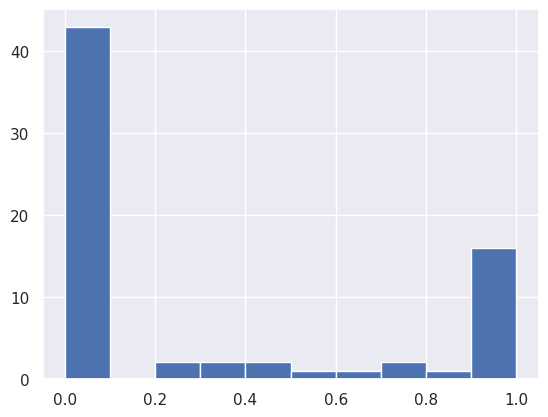

In [57]:
plt.hist(y_hat_probs)
plt.show()

In [58]:
np.max(y_hat_probs)

0.9999962641951218

In [59]:
# count the number of probabilities greater than 0.9 (i.e highly likely to get promoted)
(y_hat_probs > 0.9).sum()

16

By default the threshold is set to 0.5. However, this does not work well for an imbalanced data set. It would predict that all credit cards will not default and hence generating too many false negatives! to avoid all these false negatives we should reduce the threshold. Let's try 10% and 30% as well.

In [60]:
y_hat_10 = np.where(y_hat_probs>0.10,1,0)
y_hat_30 = np.where(y_hat_probs>0.30,1,0)

In [61]:
# let's put all the predictions together in a data frame.
df_predictions = pd.DataFrame({'y_test':y_test,
                               'y_hat_probs':y_hat_probs,
                               'y_hat_50':y_hat,
                               'y_hat_10':y_hat_10,
                               'y_hat_30':y_hat_30})
df_predictions.tail()

,y_test,y_hat_probs,y_hat_50,y_hat_10,y_hat_30
215,0,0.000448,0,0,0
289,1,0.995228,1,1,1
232,0,0.000589,0,0,0
1,0,0.002868,0,0,0
26,0,0.000193,0,0,0


### Performance metrics:

In [62]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

#### Confusion matrix

In [63]:
print(confusion_matrix(y_test, y_hat))

[[47  2]
 [ 2 19]]


#### Built-in classification report

In [64]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        49
           1       0.90      0.90      0.90        21

    accuracy                           0.94        70
   macro avg       0.93      0.93      0.93        70
weighted avg       0.94      0.94      0.94        70



In [65]:
matthews_corrcoef(y_test,y_hat)

0.8639455782312925

### Defining my own logistic regression report:

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef



def my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5, penalty='none', class_weight=None): # you could make it even more general!
    logistic= LogisticRegression(class_weight=class_weight, penalty=penalty)
    logistic.fit(X_train, y_train)
    probs = logistic.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)

    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,2)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    MCC = round(matthews_corrcoef(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])

    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print('MCC       = {}'.format(MCC))
    print("-----------------------------------------")
    return cm_labled


In [68]:
my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5, penalty=None)

-----------------------------------------
Accuracy  = 0.94
Precision = 0.9
Recall    = 0.9
f1_score  = 0.9
MCC       = 0.86
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,47,2
Actual : positive,2,19


**Exercise**: What will happen to my_logistic_report outputs if threshold=0.1? What about 0.9? what about 0.0001?

In [70]:
my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.1, penalty=None)


-----------------------------------------
Accuracy  = 0.91
Precision = 0.78
Recall    = 1.0
f1_score  = 0.88
MCC       = 0.83
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,43,6
Actual : positive,0,21


**Challenge**: If as a lending company, your profit is defined as below:

$(TN*V) - (FN*4*V)$   where V=constant dollar amount, then which threshold will maximize your profit? 0.1, 0.5 or 0.9

----
**Solution:**

In [71]:
my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5, penalty=None)

-----------------------------------------
Accuracy  = 0.94
Precision = 0.9
Recall    = 0.9
f1_score  = 0.9
MCC       = 0.86
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,47,2
Actual : positive,2,19


In [77]:
from sklearn.metrics import confusion_matrix

def my_profit(X_train, y_train, X_test,y_test, threshold=0.5, penalty= None, V_TN=10, V_FN=10):
    logistic= LogisticRegression(class_weight=None, penalty='none')
    logistic.fit(X_train, y_train)
    probs = logistic.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)
    cm = confusion_matrix(y_test, y_hat)

    TN = cm[0,0]
    FN = cm[1,0]

    return (TN*V_TN) - (FN*4*V_FN)


---
---
# PyCaret

1. **PyCaret**: https://pycaret.readthedocs.io/en/latest/index.html PyCaret3.0
2. **scikit-learn**: https://scikit-learn.org/stable/index.html
3. **PyCaret model containers** : https://github.com/pycaret/pycaret/tree/master/pycaret/containers/models

# Installation

Follow the steps here: https://pycaret.gitbook.io/docs/get-started/installation


In [80]:
#only if you want to run it in Google Colab:
# for this chapter, we can install the light version of PyCaret as belo
!pip install pycaret

In [1]:
# if you got a warning that you need to "RESTART RUNTIME", go ahead and press that button.

# let's double ckeck the Pycaret version:
from pycaret.utils import version
version()

'3.3.0'

In [81]:
df_py = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/Default.csv')

In [ ]:
df_py.head()

,default,student,balance,income
0,No,No,729.526495,44361.62500
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [82]:
from pycaret.classification import *


In [84]:
setup(data=df_py,  target='default', session_id=555, train_size=0.7, preprocess=True, categorical_features= ['student'])


,Description,Value
0,Session id,555
1,Target,default
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(10000, 4)"
5,Transformed data shape,"(10000, 4)"
6,Transformed train set shape,"(7000, 4)"
7,Transformed test set shape,"(3000, 4)"
8,Numeric features,2
9,Categorical features,1


In [85]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## Create and tune model

In [86]:
logistic_reg = create_model(estimator='lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9743,0.0000,0.9743,0.9703,0.9688,0.4269,0.4769
1,0.9800,0.0000,0.9800,0.9781,0.9773,0.6017,0.6276
2,0.9743,0.0000,0.9743,0.9700,0.9699,0.4591,0.4922
3,0.9686,0.0000,0.9686,0.9635,0.9654,0.4056,0.4155
4,0.9714,0.0000,0.9714,0.9653,0.9653,0.3632,0.4058
5,0.9743,0.0000,0.9743,0.9703,0.9688,0.4269,0.4769
6,0.9700,0.0000,0.9700,0.9670,0.9682,0.4726,0.4764
7,0.9743,0.0000,0.9743,0.9720,0.9680,0.4277,0.4968
8,0.9729,0.0000,0.9729,0.9700,0.9656,0.3775,0.4545


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [87]:
tuned_logistic_reg = tune_model(logistic_reg)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9743,0.0000,0.9743,0.9703,0.9688,0.4269,0.4769
1,0.9800,0.0000,0.9800,0.9781,0.9773,0.6017,0.6276
2,0.9743,0.0000,0.9743,0.9700,0.9699,0.4591,0.4922
3,0.9686,0.0000,0.9686,0.9635,0.9654,0.4056,0.4155
4,0.9714,0.0000,0.9714,0.9653,0.9653,0.3632,0.4058
5,0.9743,0.0000,0.9743,0.9703,0.9688,0.4269,0.4769
6,0.9700,0.0000,0.9700,0.9670,0.9682,0.4726,0.4764
7,0.9743,0.0000,0.9743,0.9720,0.9680,0.4277,0.4968
8,0.9729,0.0000,0.9729,0.9700,0.9656,0.3775,0.4545


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [88]:
tuned_logistic_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 555,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

C: Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.

## Plot Model


In [89]:
plot_model(tuned_logistic_reg, plot = 'parameter')

,Parameters
C,1.0
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


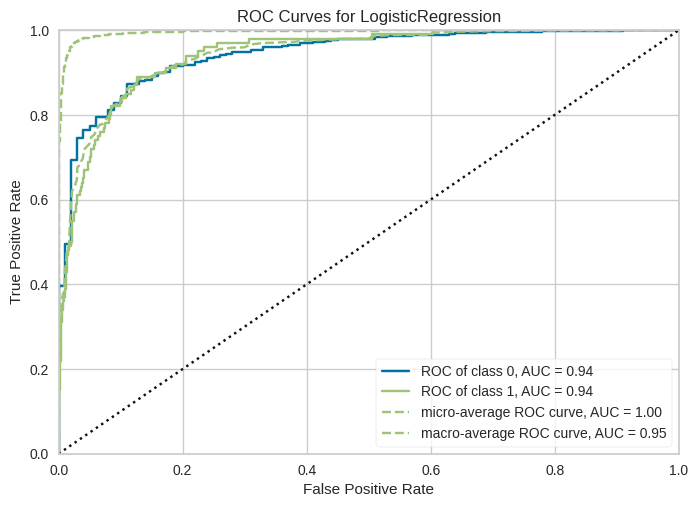

In [90]:
plot_model(tuned_logistic_reg, plot = 'auc')

the macro-average ROC curve calculates the TPR and FPR separately for each class, and then averages these values across all classes. Micro-average however, is the weighted average version!

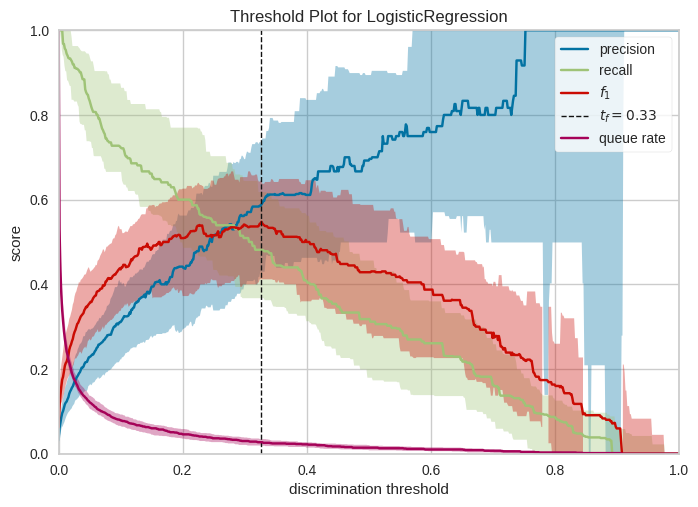

In [91]:
plot_model(tuned_logistic_reg, plot = 'threshold')

Optimal Threshold:

You see a vertical line indicating an optimal threshold value that balances different metrics. The optimal threshold is where you might get a balanced performance based on your specific problem requirements.

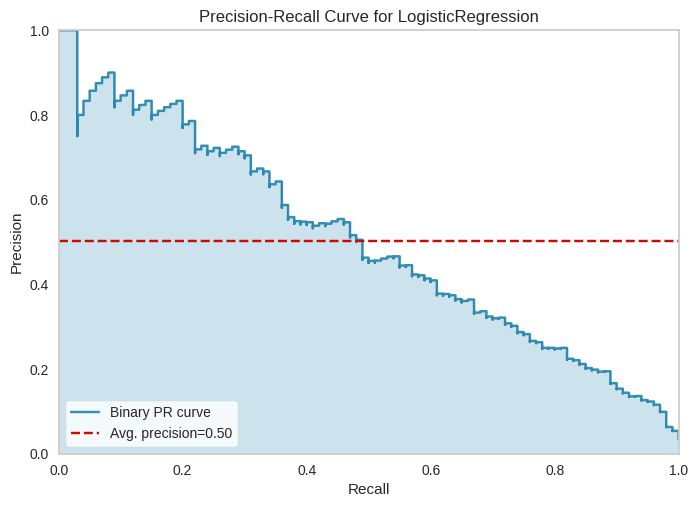

In [92]:
plot_model(tuned_logistic_reg, plot = 'pr')

The Average Precision (AP) score is a summary metric that quantifies the quality of the Precision-Recall (PR) curve. It computes the average precision value for recall value over the interval [0, 1]. The AP score provides a single number summary of the information contained in the PR curve, and it's particularly useful when you want to compare different models.

A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

The PR chart is useful in such situations because it provides a way to visualize the trade-off between precision and recall for different classification thresholds. Overall, the precision-recall chart is a useful tool for evaluating the performance of binary classification models, especially in situations where the classes are imbalanced or where the cost of false positives and false negatives is different.
Here, the average precision =0.3 which is better than the average precision for the no-skill model (which is 0). An AP score of 0.3 means that, on average, the model has a precision of 0.3 across all recall values.

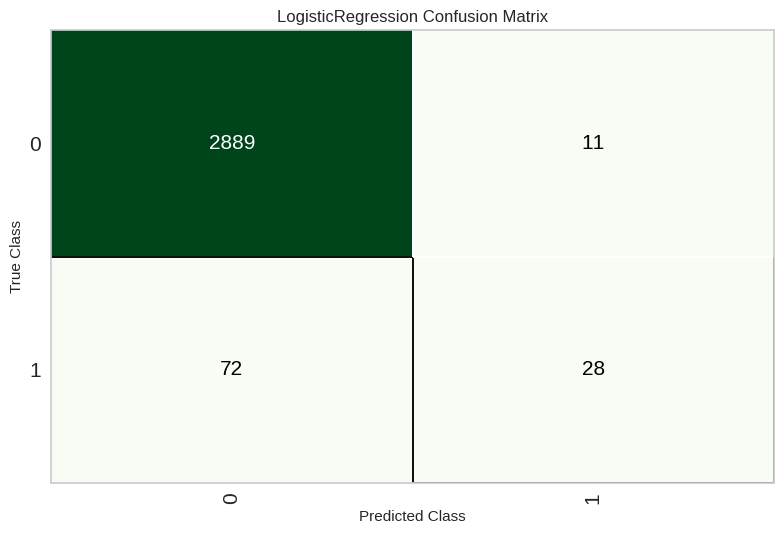

In [93]:
plot_model(tuned_logistic_reg, plot = 'confusion_matrix')

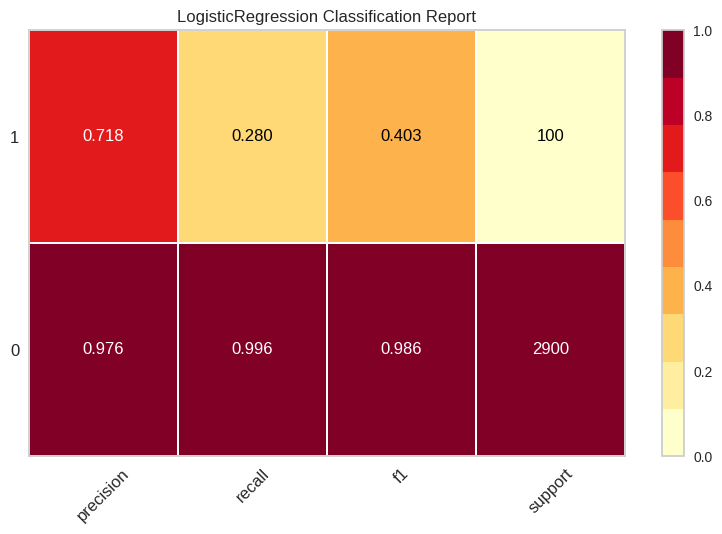

In [94]:
plot_model(tuned_logistic_reg, plot = 'class_report')

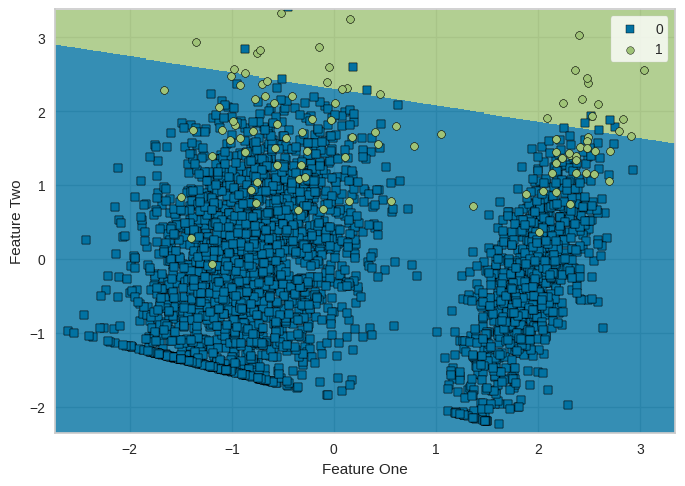

In [95]:
plot_model(tuned_logistic_reg, plot = 'boundary')

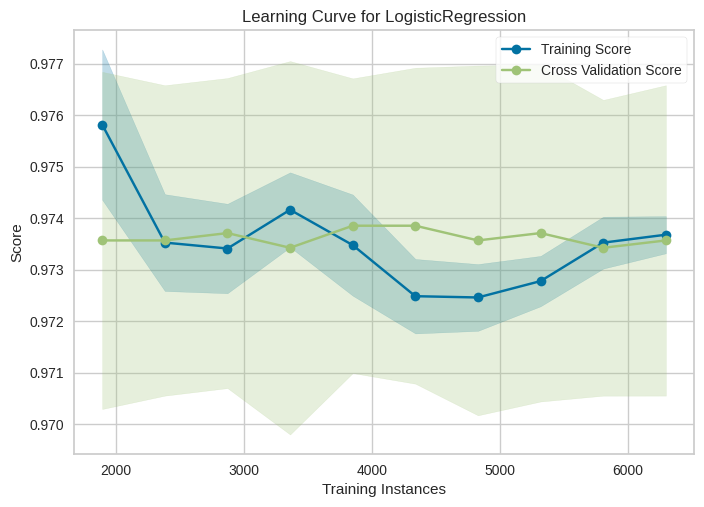

In [96]:
plot_model(tuned_logistic_reg, plot = 'learning')

----
Done!

###  Additional links:
1. Logistic regression sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
2. Why logistic regression is a linear classifier: https://homes.cs.washington.edu/~marcotcr/blog/linear-classifiers/
3. Is accuracy everything? https://towardsdatascience.com/is-accuracy-everything-96da9afd540d
4. micro, macro, weighted average in classification report: https://stackoverflow.com/questions/55740220/macro-vs-micro-vs-weighted-vs-samples-f1-score
5. ROC Curves and Precision-Recall Curves for Imbalanced Classification: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/
